ddd [(116, -1125), (167, -1078), (145, -969), (163, -942), (153, -912), (166, -889), (160, -869), (163, -845), (167, -821), (168, -777), (70, 33), (103, 33), (134, 34), (167, 35), (197, 35), (227, 36), (258, 36), (288, 37), (320, 37), (64, 101), (99, 101), (133, 101), (167, 101), (199, 101), (232, 101), (265, 101), (297, 101), (331, 101), (4192, 101), (12427, 101), (60, 137), (96, 137), (132, 137), (167, 137), (201, 137), (235, 137), (268, 137), (302, 137), (337, 137), (6388, 137), (10363, 137), (8437, 170), (51, 218), (91, 218), (129, 218), (167, 218), (204, 218), (240, 218), (277, 218), (313, 218), (352, 218), (5719, 218), (11329, 218), (368, 311), (287, 312), (327, 312), (247, 313), (167, 314), (207, 314), (126, 315), (84, 316), (41, 317), (-4371, 394), (33, 394), (79, 394), (124, 394), (167, 394), (210, 394), (253, 394), (296, 394), (338, 394), (383, 394), (22065, 394), (-4486, 396), (33, 396), (79, 396), (124, 396), (167, 396), (210, 396), (253, 396), (296, 396), (339, 396), (383,

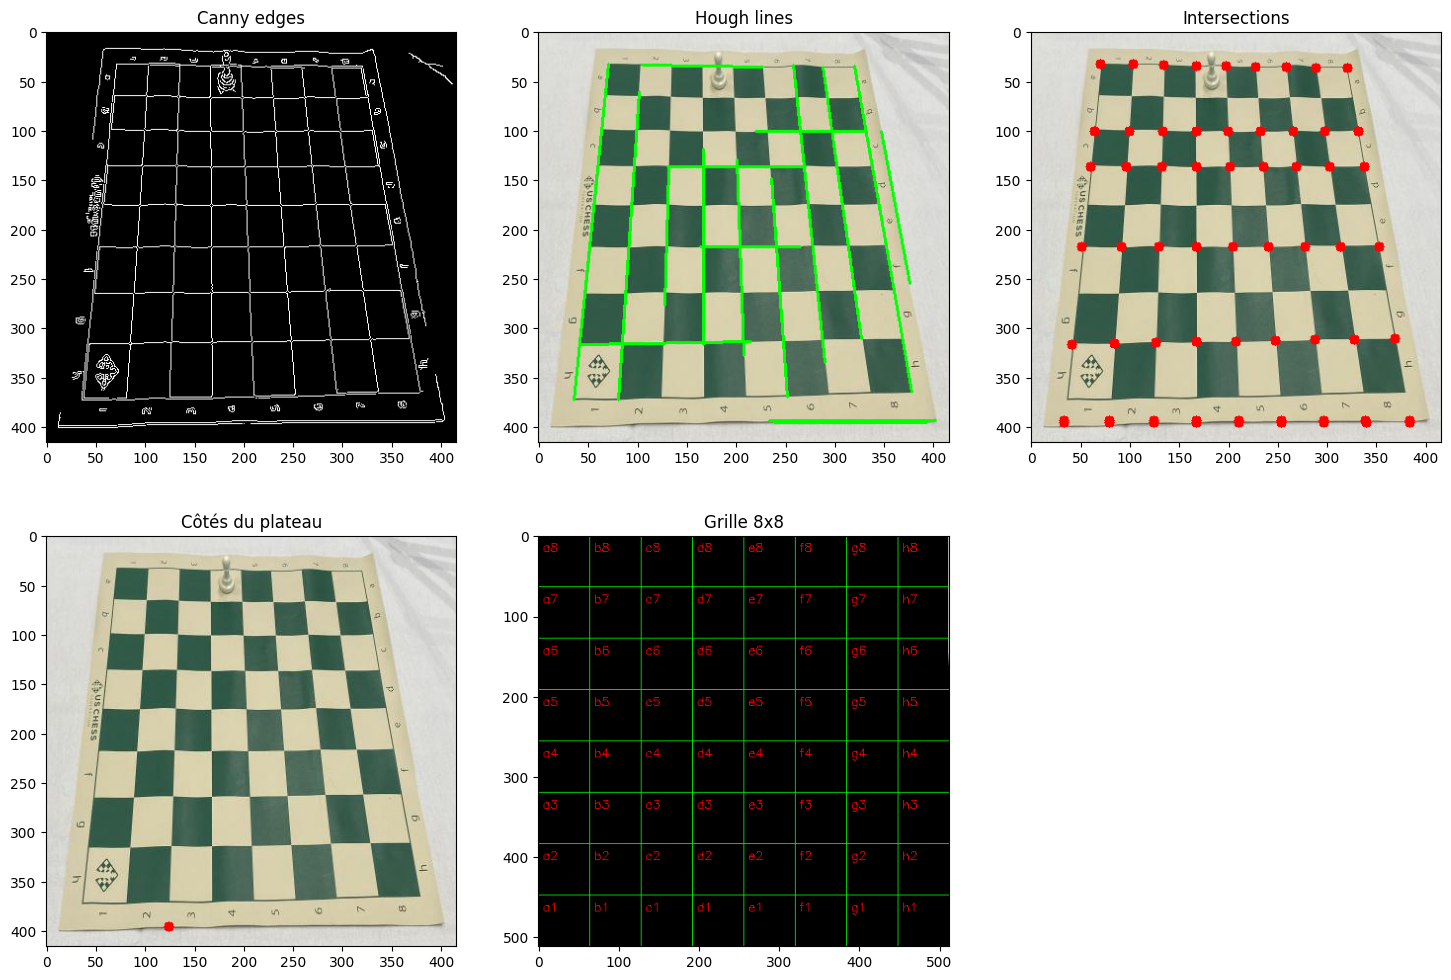

a8: {'top_left': (0, 0), 'bottom_right': (64, 64)}
b8: {'top_left': (64, 0), 'bottom_right': (128, 64)}
c8: {'top_left': (128, 0), 'bottom_right': (192, 64)}
d8: {'top_left': (192, 0), 'bottom_right': (256, 64)}
e8: {'top_left': (256, 0), 'bottom_right': (320, 64)}
f8: {'top_left': (320, 0), 'bottom_right': (384, 64)}
g8: {'top_left': (384, 0), 'bottom_right': (448, 64)}
h8: {'top_left': (448, 0), 'bottom_right': (512, 64)}
a7: {'top_left': (0, 64), 'bottom_right': (64, 128)}
b7: {'top_left': (64, 64), 'bottom_right': (128, 128)}
c7: {'top_left': (128, 64), 'bottom_right': (192, 128)}
d7: {'top_left': (192, 64), 'bottom_right': (256, 128)}
e7: {'top_left': (256, 64), 'bottom_right': (320, 128)}
f7: {'top_left': (320, 64), 'bottom_right': (384, 128)}
g7: {'top_left': (384, 64), 'bottom_right': (448, 128)}
h7: {'top_left': (448, 64), 'bottom_right': (512, 128)}
a6: {'top_left': (0, 128), 'bottom_right': (64, 192)}
b6: {'top_left': (64, 128), 'bottom_right': (128, 192)}
c6: {'top_left': (

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_chessboard_grid(image_path):
    # Charger l'image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Détection des bords avec Canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 3, 1)
    plt.title("Canny edges")
    plt.imshow(edges, cmap='gray')

    # Détection des lignes avec Hough Line Transform
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    hough_img = img_rgb.copy()

    # Dessiner les lignes détectées
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(hough_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.subplot(2, 3, 2)
    plt.title("Hough lines")
    plt.imshow(hough_img)

    # Fonction pour calculer l'intersection entre deux lignes
    def line_intersection(line1, line2):
        xdiff = (line1[0] - line1[2], line2[0] - line2[2])
        ydiff = (line1[1] - line1[3], line2[1] - line2[3])

        def det(a, b):
            return a[0] * b[1] - a[1] * b[0]

        div = det(xdiff, ydiff)
        if div == 0:
            return None  # Les lignes sont parallèles

        d = (det((line1[0], line1[1]), (line1[2], line1[3])), 
             det((line2[0], line2[1]), (line2[2], line2[3])))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
        return int(x), int(y)

    # Trouver les intersections des lignes
    intersections = []
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            line1 = lines[i][0]
            line2 = lines[j][0]
            intersect = line_intersection(line1, line2)
            if intersect:
                intersections.append(intersect)

    # Filtrer les intersections proches (pour éviter les doublons)
    intersections = sorted(intersections, key=lambda x: (x[1], x[0]))
    unique_intersections = []
    for pt in intersections:
        if not unique_intersections or np.linalg.norm(np.array(pt) - np.array(unique_intersections[-1])) > 20:
            unique_intersections.append(pt)
    print("ddd", unique_intersections)
    # Afficher les points d'intersection
    intersection_img = img_rgb.copy()
    
    for pt in unique_intersections:
        cv2.circle(intersection_img, pt, 5, (255, 0, 0), -1)
    plt.subplot(2, 3, 3)
    plt.title("Intersections")
    plt.imshow(intersection_img)

    # Vérifier le nombre de points d'intersection pour redresser l'image
    if len(unique_intersections) < 81:
        print("Erreur : intersections insuffisantes pour la grille.")
        plt.show()
        return None

    # Définir les coins extrêmes pour la transformation de perspective
    sorted_pts = np.array(sorted(unique_intersections, key=lambda x: (x[1], x[0])))
    src_pts = np.float32([sorted_pts[0], sorted_pts[7], sorted_pts[-8], sorted_pts[-1]])  # coins de l'échiquier
    dst_pts = np.float32([[0, 0], [0, 512], [512, 0], [512, 512]])
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(img_rgb, M, (512, 512))
    print("enifneff", src_pts)
    
    # Afficher les points d'intersection
    intersection_img_2 = img_rgb.copy()
    for pt in src_pts:
        cv2.circle(intersection_img_2, (int(pt[0]), int(pt[1])), 5, (255, 0, 0), -1)
    plt.subplot(2, 3, 4)
    plt.title("Côtés du plateau")
    plt.imshow(intersection_img_2)
    
    # Affichage de l'échiquier redressé
    plt.subplot(2, 3, 5)
    plt.title("Warped Chessboard")
    plt.imshow(warped)

    # Création d'une grille régulière 8x8 sur l'image redressée
    W, H = 512, 512
    square_w, square_h = W // 8, H // 8
    grid = {}
    columns = 'abcdefgh'
    rows = '87654321'

    for i in range(8):
        for j in range(8):
            x_left = j * square_w
            y_top = i * square_h
            grid[f"{columns[j]}{rows[i]}"] = {
                "top_left": (x_left, y_top),
                "bottom_right": (x_left + square_w, y_top + square_h)
            }
    
    # Dessiner la grille pour visualisation
    grid_img = warped.copy()
    for case, coords in grid.items():
        top_left = coords["top_left"]
        bottom_right = coords["bottom_right"]
        cv2.rectangle(grid_img, top_left, bottom_right, (0, 255, 0), 1)
        cv2.putText(grid_img, case, (top_left[0] + 5, top_left[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    plt.subplot(2, 3, 5)
    plt.title("Grille 8x8")
    plt.imshow(grid_img)
    plt.show()

    return grid

# Exemple d'utilisation
image_path = "board_exemple_2.jpg"
chessboard_cases = detect_chessboard_grid(image_path)
if chessboard_cases:
    for case, corners in chessboard_cases.items():
        print(f"{case}: {corners}")


56
56
[[ 62.  63.]
 [321.  67.]
 [ 28. 394.]
 [378. 391.]]


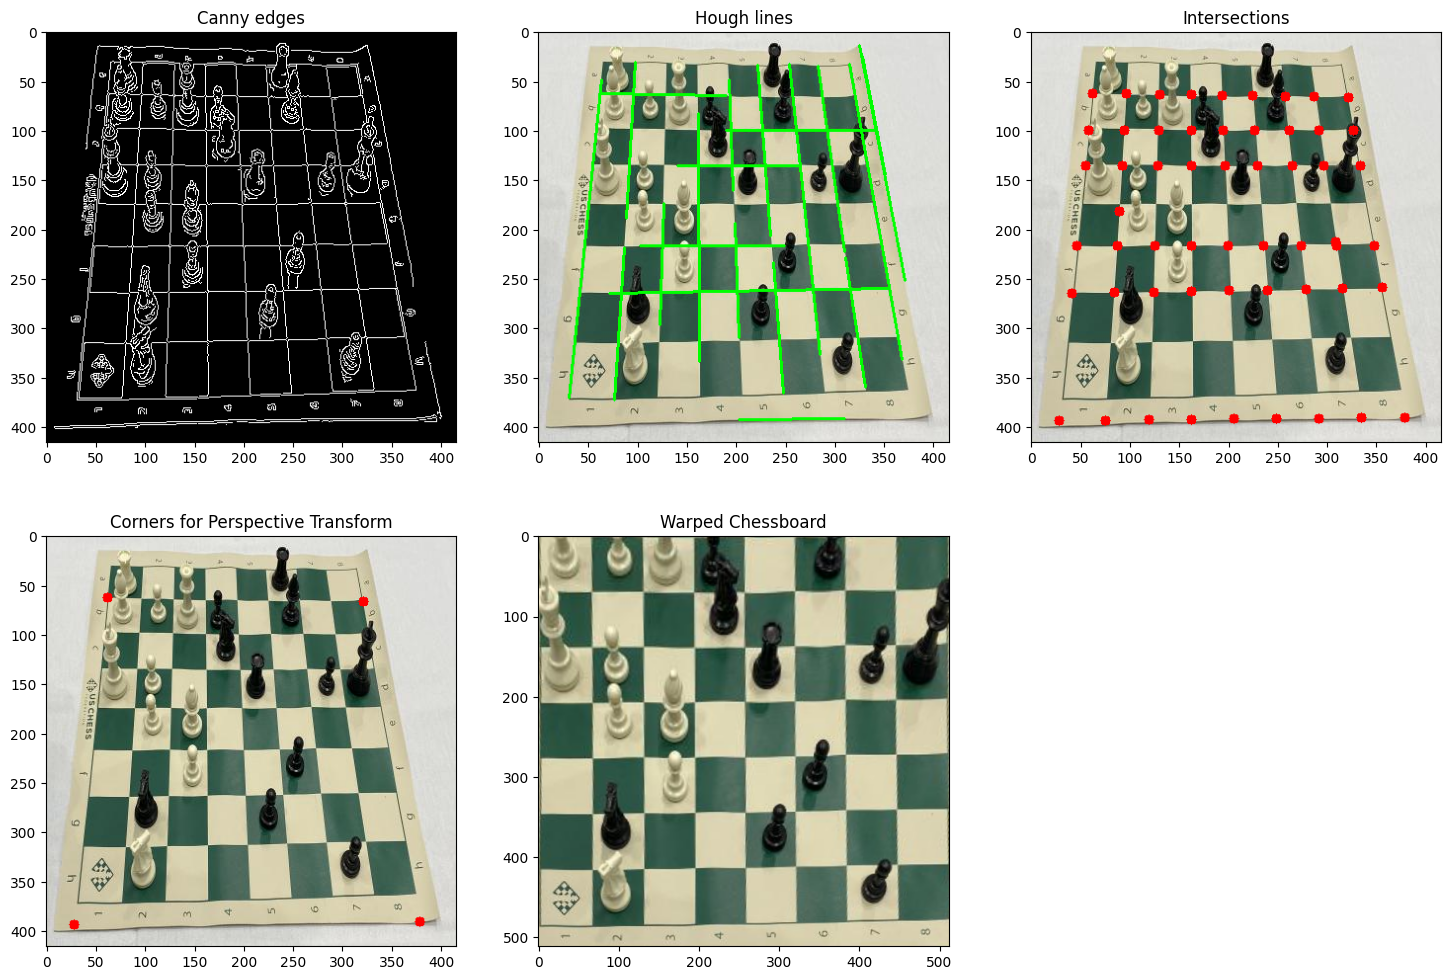

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_chessboard_corners(intersections):
    # Convertir en numpy array pour faciliter les manipulations
    intersections = np.array(intersections)
    
    # Sélectionner les coins extrêmes en utilisant les valeurs min et max de X et Y
    top_left = intersections[np.argmin(intersections[:, 0] + intersections[:, 1])]
    top_right = intersections[np.argmax(intersections[:, 0] - intersections[:, 1])]
    bottom_left = intersections[np.argmin(intersections[:, 0] - intersections[:, 1])]
    bottom_right = intersections[np.argmax(intersections[:, 0] + intersections[:, 1])]

    # Définir les points source pour la transformation de perspective
    src_pts = np.float32([top_left, top_right, bottom_left, bottom_right])
    return src_pts

def detect_chessboard_grid(image_path):
    # Charger l'image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Détection des bords avec Canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    plt.figure(figsize=(18, 12))
    plt.subplot(2, 3, 1)
    plt.title("Canny edges")
    plt.imshow(edges, cmap='gray')

    # Détection des lignes avec Hough Line Transform
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    hough_img = img_rgb.copy()

    # Dessiner les lignes détectées
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(hough_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.subplot(2, 3, 2)
    plt.title("Hough lines")
    plt.imshow(hough_img)

    # Fonction pour calculer l'intersection entre deux lignes
    def line_intersection(line1, line2):
        xdiff = (line1[0] - line1[2], line2[0] - line2[2])
        ydiff = (line1[1] - line1[3], line2[1] - line2[3])

        def det(a, b):
            return a[0] * b[1] - a[1] * b[0]

        div = det(xdiff, ydiff)
        if div == 0:
            return None  # Les lignes sont parallèles

        d = (det((line1[0], line1[1]), (line1[2], line1[3])), 
             det((line2[0], line2[1]), (line2[2], line2[3])))
        x = det(d, xdiff) / div
        y = det(d, ydiff) / div
        return int(x), int(y)

    # Trouver les intersections des lignes
    intersections = []
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            line1 = lines[i][0]
            line2 = lines[j][0]
            intersect = line_intersection(line1, line2)
            if intersect:
                intersections.append(intersect)
    taille_image = np.shape(edges)
    # Filtrer les intersections proches (pour éviter les doublons)
    intersections = sorted(intersections, key=lambda x: (x[1], x[0]))
    unique_intersections = []
    for pt in intersections:
        if not unique_intersections or np.linalg.norm(np.array(pt) - np.array(unique_intersections[-1])) > 20:
            # Et on vérifie s'ils sont dans l'image et que les points soient positifs
            if pt[0]<taille_image[0] and pt[1]< taille_image[1] and pt[0]>0 and pt[1]>0:
                unique_intersections.append(pt)

    # Afficher les points d'intersection
    intersection_img = img_rgb.copy()
    for pt in unique_intersections:
        cv2.circle(intersection_img, pt, 5, (255, 0, 0), -1)
    plt.subplot(2, 3, 3)
    plt.title("Intersections")
    plt.imshow(intersection_img)

    print(len(unique_intersections))
    # Utiliser les intersections pour obtenir les coins de l'échiquier
    print(len(unique_intersections))
    src_pts = get_chessboard_corners(unique_intersections)
    dst_pts = np.float32([[0, 0], [512, 0], [0, 512], [512, 512]])
    print(src_pts)
    # Calculer la transformation de perspective
    M = cv2.getPerspectiveTransform(src_pts, dst_pts)
    warped = cv2.warpPerspective(img_rgb, M, (512, 512))

    # Afficher les points d'intersection utilisés pour la transformation
    intersection_img_2 = img_rgb.copy()
    for pt in src_pts:
        cv2.circle(intersection_img_2, (int(pt[0]), int(pt[1])), 5, (255, 0, 0), -1)
    plt.subplot(2, 3, 4)
    plt.title("Corners for Perspective Transform")
    plt.imshow(intersection_img_2)
    
    # Affichage de l'échiquier redressé
    plt.subplot(2, 3, 5)
    plt.title("Warped Chessboard")
    plt.imshow(warped)
    plt.show()

# Exemple d'utilisation
image_path = "board_exemple.jpg"
detect_chessboard_grid(image_path)
